In [2]:
import torch
from torch import nn

import matplotlib.pyplot as plt
import math

import torchvision
import torchvision.transforms as transforms

In [3]:
torch.manual_seed(111)

In [4]:
device = ""
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("gpu")
else:
    device = torch.device("cpu")
    print("cpu")

gpu


In [5]:
transform = transforms.Compose(
[transforms.ToTensor(), transforms.Normalize((0.5,),(0.5,))]
)

In [6]:
train_set = torchvision.datasets.MNIST(
root=".",train=True, download=True, transform=transform)

In [7]:
batch_size =32
train_loader =torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)

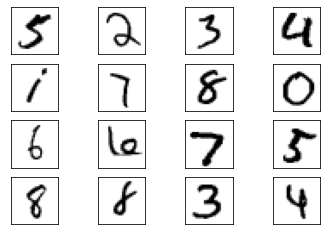

In [8]:
real_samples, mnist_labels = next(iter(train_loader))
for i in range(16):
    ax = plt.subplot(4, 4, i+1)
    plt.imshow(real_samples[i].reshape(28,28), cmap="gray_r")
    plt.xticks([])
    plt.yticks([])

In [9]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(784, 1024),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),

        )

    def forward(self, x):
        x = x.view(x.size(0),784)
        output = self.model(x)
        return output

In [10]:
discriminator = Discriminator().to(device=device)

In [11]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(100,256),
            nn.ReLU(),
            nn.Linear(256,512),
            nn.ReLU(),
            nn.Linear(512,1024),
            nn.ReLU(),
            nn.Linear(1024,784),
            nn.Tanh(),
        )
    def forward(self, x):
        output = self.model(x)
        output = output.view(x.size(0),1,28,28)
        return(output)

generator = Generator().to(device=device)

In [12]:
lr = 0.0001
num_epochs = 50
loss_function = nn.BCELoss()
optimizer_discriminator = torch.optim.Adam(discriminator.parameters(),lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)


In [13]:
for epoch in range(num_epochs):

    for n, (real_samples, _) in enumerate(train_loader):

        # Data for training the discriminator
        real_samples = real_samples.to(device=device)
        real_samples_labels = torch.ones((batch_size, 1)).to(
            device=device
        )
        latent_space_samples = torch.randn((batch_size, 100)).to(
            device=device
        )
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1)).to(
            device=device
        )
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat(
            (real_samples_labels, generated_samples_labels)
        )

        # Training the discriminator
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(
            output_discriminator, all_samples_labels)
        loss_discriminator.backward()
        optimizer_discriminator.step()


        # Data for training the generator      
        latent_space_samples = torch.randn((batch_size, 100)).to(
            device=device
        )

        # Training the generator
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(
            output_discriminator_generated, real_samples_labels
        )
        loss_generator.backward()
        optimizer_generator.step()


        # Show loss
        if n == batch_size-1:
            print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
            print(f"Epoch: {epoch} Loss G.: {loss_generator}")

Epoch: 0 Loss D.: 0.5333443880081177
Epoch: 0 Loss G.: 0.5375176072120667
Epoch: 1 Loss D.: 0.004779263399541378
Epoch: 1 Loss G.: 6.7833051681518555
Epoch: 2 Loss D.: 0.05026233196258545
Epoch: 2 Loss G.: 5.985546112060547
Epoch: 3 Loss D.: 0.013004176318645477
Epoch: 3 Loss G.: 8.310296058654785
Epoch: 4 Loss D.: 0.08216343820095062
Epoch: 4 Loss G.: 5.719272136688232
Epoch: 5 Loss D.: 0.07559557259082794
Epoch: 5 Loss G.: 3.6245040893554688
Epoch: 6 Loss D.: 0.04144759103655815
Epoch: 6 Loss G.: 4.358296871185303
Epoch: 7 Loss D.: 0.14477451145648956
Epoch: 7 Loss G.: 3.0450210571289062
Epoch: 8 Loss D.: 0.10010644793510437
Epoch: 8 Loss G.: 3.0658390522003174
Epoch: 9 Loss D.: 0.25798892974853516
Epoch: 9 Loss G.: 2.3864378929138184
Epoch: 10 Loss D.: 0.4010971486568451
Epoch: 10 Loss G.: 2.1596357822418213
Epoch: 11 Loss D.: 0.41379374265670776
Epoch: 11 Loss G.: 1.7216639518737793
Epoch: 12 Loss D.: 0.36105602979660034
Epoch: 12 Loss G.: 1.5520299673080444
Epoch: 13 Loss D.: 0.41

In [14]:
latent_sapce_samples = torch.randn(batch_size,100).to(device=device)
generated_samples = generator(latent_sapce_samples)

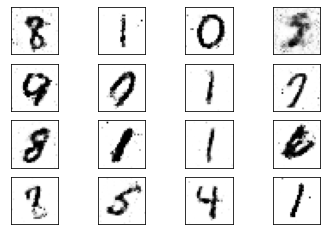

In [15]:
generated_samples = generated_samples.cpu().detach()
for i in range(16):
    ax = plt.subplot(4,4,i+1)
    plt.imshow(generated_samples[i].reshape(28,28), cmap ="gray_r")
    plt.xticks([])
    plt.yticks([])